Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from pathlib import Path

In [2]:
from keras.preprocessing import image
p = Path('flowers')
dirs = p.glob('*')
image_data = []
labels = []
label_dict = {'dandelion':0,'daisy':1,'flowers':2,'sunflower':3,'tulip':4,'rose':5}
for folder_dir in dirs:
    label= str(folder_dir).split('\\')[-1]
    cnt = 0
    print(label)
    for image_path in folder_dir.glob('*.jpg'):
        img = image.load_img(image_path,target_size = (64,64))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        #print('img_array',img_array)
        labels.append(label_dict[label])

daisy
dandelion
rose
sunflower
tulip


In [3]:
print(len(image_data),len(labels))

4323 4323


In [4]:
x = np.array(image_data)
y = np.array(labels)

In [5]:
x.shape

(4323, 64, 64, 3)

In [6]:
y.shape

(4323,)

In [7]:
rgb_weights = [0.2989, 0.5870, 0.1140]
#Rec. 601 Color Transform
gx=x
grayscale_image = np.dot(gx[...,:3], rgb_weights)

In [8]:
grayscale_image.shape

(4323, 64, 64)

In [9]:
grayscale_image[0]

array([[140.7579, 148.9851, 152.2128, ..., 161.8528, 153.7566, 152.9847],
       [134.8294, 145.0564, 168.9661, ..., 158.8531, 154.7565, 148.9851],
       [124.0755, 139.0462, 151.9848, ..., 155.9844, 156.7563, 142.0567],
       ...,
       [ 40.7049,  42.7047,  48.8011, ..., 124.8412, 121.8415, 122.3145],
       [ 42.7047,  42.7047,  52.6436, ..., 127.069 , 126.0691, 124.0693],
       [ 43.7046,  44.7045,  52.0027, ..., 134.0683, 130.0687, 127.069 ]])

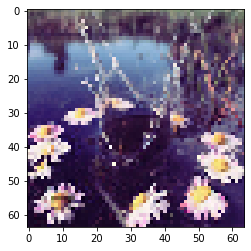

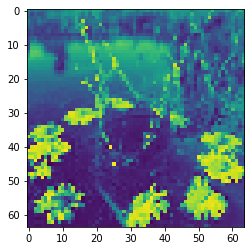

1

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x[2]/255.0)
plt.show()
plt.imshow(grayscale_image[2]/255.0)
plt.show()
y[2]

In [11]:
np.unique(y)

array([0, 1, 3, 4, 5])

In [12]:
All_images = grayscale_image.reshape((len(grayscale_image), 64 * 64))
All_images = All_images.astype('float32') / 255.0

In [13]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(64 * 64,)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))


In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(All_images,y,test_size=0.20,random_state=55)

In [15]:
from keras.utils import to_categorical
train_labels = to_categorical(ytrain)
test_labels = to_categorical(ytest)

In [16]:
train_labels.shape

(3458, 6)

In [17]:
train_labels

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [19]:
model.fit(xtrain, train_labels, epochs=100, batch_size=256)

Epoch 1/100
14/14 [==============================] - 3s 39ms/step - loss: 2.2061 - accuracy: 0.2091
Epoch 2/100
14/14 [==============================] - 0s 35ms/step - loss: 1.6286 - accuracy: 0.2620
Epoch 3/100
14/14 [==============================] - 0s 31ms/step - loss: 1.6077 - accuracy: 0.2757
Epoch 4/100
14/14 [==============================] - 0s 30ms/step - loss: 1.5854 - accuracy: 0.2797
Epoch 5/100
14/14 [==============================] - 0s 28ms/step - loss: 1.6194 - accuracy: 0.2756
Epoch 6/100
14/14 [==============================] - 0s 22ms/step - loss: 1.5350 - accuracy: 0.3009
Epoch 7/100
14/14 [==============================] - 0s 26ms/step - loss: 1.5525 - accuracy: 0.3058
Epoch 8/100
14/14 [==============================] - 0s 22ms/step - loss: 1.6480 - accuracy: 0.2813
Epoch 9/100
14/14 [==============================] - 0s 29ms/step - loss: 1.5328 - accuracy: 0.3035
Epoch 10/100
14/14 [==============================] - 0s 24ms/step - loss: 1.5601 - accuracy: 0.3060

14/14 [==============================] - 0s 14ms/step - loss: 1.1440 - accuracy: 0.5607
Epoch 83/100
14/14 [==============================] - 0s 12ms/step - loss: 1.2060 - accuracy: 0.5053
Epoch 84/100
14/14 [==============================] - 0s 13ms/step - loss: 1.1175 - accuracy: 0.5622
Epoch 85/100
14/14 [==============================] - 0s 14ms/step - loss: 1.2982 - accuracy: 0.4867
Epoch 86/100
14/14 [==============================] - 0s 13ms/step - loss: 1.1358 - accuracy: 0.5508
Epoch 87/100
14/14 [==============================] - 0s 12ms/step - loss: 1.1721 - accuracy: 0.5378
Epoch 88/100
14/14 [==============================] - 0s 12ms/step - loss: 1.1396 - accuracy: 0.5459
Epoch 89/100
14/14 [==============================] - 0s 13ms/step - loss: 1.1493 - accuracy: 0.5461
Epoch 90/100
14/14 [==============================] - 0s 14ms/step - loss: 1.1848 - accuracy: 0.5197
Epoch 91/100
14/14 [==============================] - 0s 15ms/step - loss: 1.1268 - accuracy: 0.5537
Epo

In [20]:
x_val = xtrain[:1000]
partial_x_train = xtrain[1000:]
y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
5/5 [==============================] - 1s 271ms/step - loss: 1.3106 - accuracy: 0.4951 - val_loss: 1.0118 - val_accuracy: 0.6210
Epoch 2/20
5/5 [==============================] - 1s 128ms/step - loss: 0.9472 - accuracy: 0.6595 - val_loss: 1.0917 - val_accuracy: 0.5550
Epoch 3/20
5/5 [==============================] - 0s 103ms/step - loss: 1.0518 - accuracy: 0.6029 - val_loss: 1.0718 - val_accuracy: 0.5730
Epoch 4/20
5/5 [==============================] - 0s 104ms/step - loss: 1.0137 - accuracy: 0.6208 - val_loss: 1.0851 - val_accuracy: 0.5840
Epoch 5/20
5/5 [==============================] - 0s 83ms/step - loss: 1.1267 - accuracy: 0.5708 - val_loss: 1.0619 - val_accuracy: 0.5990
Epoch 6/20
5/5 [==============================] - 0s 86ms/step - loss: 1.0306 - accuracy: 0.6082 - val_loss: 0.9700 - val_accuracy: 0.6540
Epoch 7/20
5/5 [==============================] - 0s 84ms/step - loss: 1.1017 - accuracy: 0.5765 - val_loss: 1.0095 - val_accuracy: 0.6270
Epoch 8/20
5/5 [=======

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

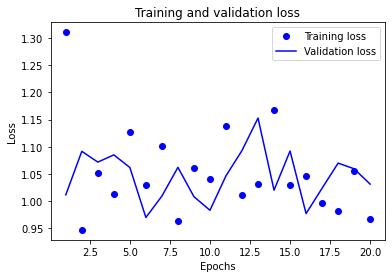

In [23]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

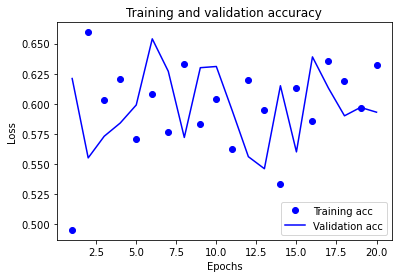

In [24]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
test_case = model.predict(xtest)
test_case

array([[4.0419886e-01, 1.9695796e-01, 1.8858318e-17, 3.4331273e-02,
        3.1886369e-01, 4.5648247e-02],
       [1.0440976e-01, 1.5486760e-01, 2.3508540e-10, 1.6566588e-01,
        4.4086704e-01, 1.3418974e-01],
       [3.2657053e-02, 1.9499443e-01, 6.9456550e-13, 4.6198037e-01,
        2.8572366e-01, 2.4644556e-02],
       ...,
       [3.6948767e-02, 9.0808094e-02, 1.7889967e-20, 4.9780399e-02,
        7.5144947e-01, 7.1013242e-02],
       [9.6420631e-02, 1.7114711e-01, 2.4016271e-09, 5.7199102e-02,
        4.4893995e-01, 2.2629319e-01],
       [2.1381949e-01, 1.3475442e-01, 1.5943614e-13, 2.2188418e-01,
        3.8604563e-01, 4.3496318e-02]], dtype=float32)

In [28]:
y_test_pred = np.argmax(test_case,axis = 1)
y_test_pred

array([0, 4, 3, 3, 4, 4, 4, 4, 3, 1, 3, 4, 3, 0, 4, 4, 4, 0, 4, 1, 5, 0,
       4, 4, 1, 4, 3, 3, 4, 0, 4, 3, 4, 1, 4, 3, 3, 5, 3, 4, 4, 3, 4, 1,
       4, 0, 0, 1, 0, 4, 1, 0, 4, 1, 0, 3, 4, 4, 0, 0, 5, 4, 4, 0, 0, 4,
       0, 1, 3, 4, 3, 0, 4, 5, 1, 4, 1, 4, 4, 4, 3, 0, 3, 0, 4, 0, 0, 1,
       0, 1, 0, 4, 0, 0, 0, 4, 0, 4, 1, 3, 1, 3, 4, 4, 4, 4, 4, 0, 1, 3,
       5, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 3, 0, 3, 4, 4, 4, 1, 4, 4, 1,
       4, 0, 4, 1, 4, 0, 3, 4, 4, 4, 0, 1, 0, 1, 5, 1, 4, 3, 4, 4, 0, 4,
       0, 4, 4, 1, 4, 1, 4, 4, 4, 5, 0, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 1,
       5, 4, 4, 4, 5, 4, 3, 5, 4, 4, 1, 4, 1, 0, 4, 0, 1, 0, 1, 0, 4, 3,
       0, 4, 5, 1, 4, 4, 0, 0, 0, 4, 1, 0, 0, 4, 0, 0, 3, 5, 0, 1, 3, 4,
       0, 5, 5, 0, 4, 4, 1, 4, 4, 0, 4, 5, 4, 0, 0, 1, 0, 1, 4, 3, 4, 4,
       4, 1, 4, 5, 0, 1, 4, 4, 1, 0, 0, 4, 4, 0, 4, 4, 4, 4, 5, 4, 0, 3,
       4, 3, 5, 4, 4, 3, 3, 3, 4, 5, 3, 4, 0, 4, 5, 1, 4, 4, 0, 0, 4, 1,
       4, 4, 0, 4, 5, 4, 1, 4, 4, 5, 0, 4, 5, 4, 4,

In [27]:
#for i in range(5):
#    print("actual",ytest[i],"predicted",y_test_pred[i])